# # Data Analysation and Visualisation

Loading the library

In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

reading the csv file and displaying some values

In [77]:
df = pd.read_csv('https://raw.githubusercontent.com/arunk347/data-science-project/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [65]:
#displaying the dimensions of the dataset
df.shape

(1599, 12)

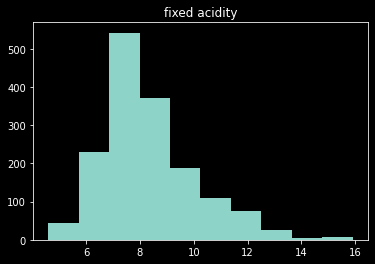

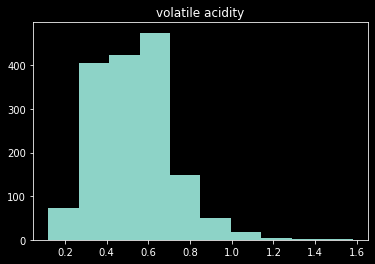

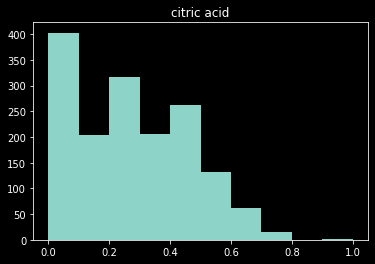

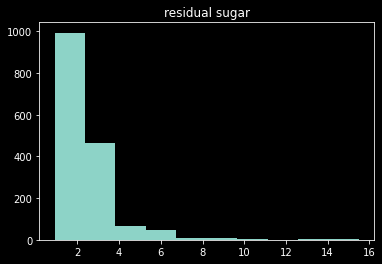

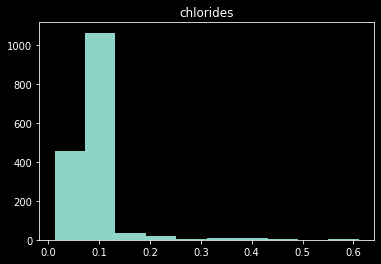

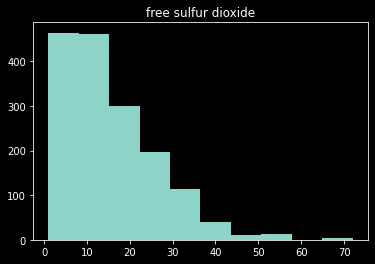

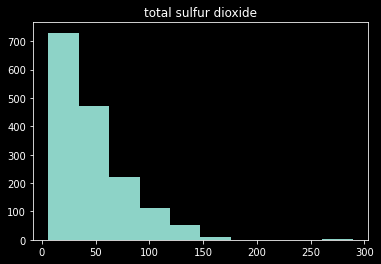

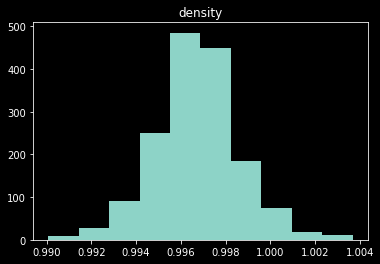

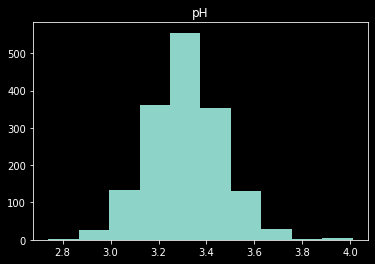

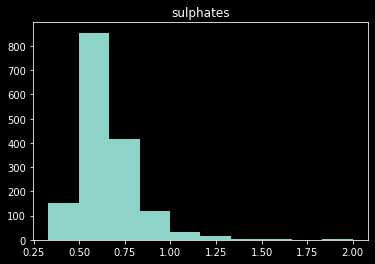

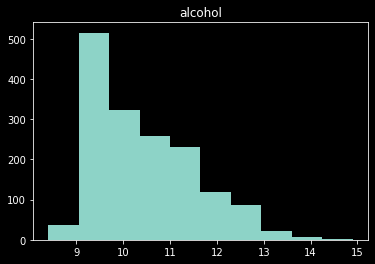

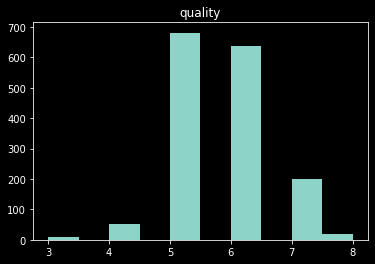

In [68]:
for col in df.columns:
    plt.title(col)
    plt.hist(df[col])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


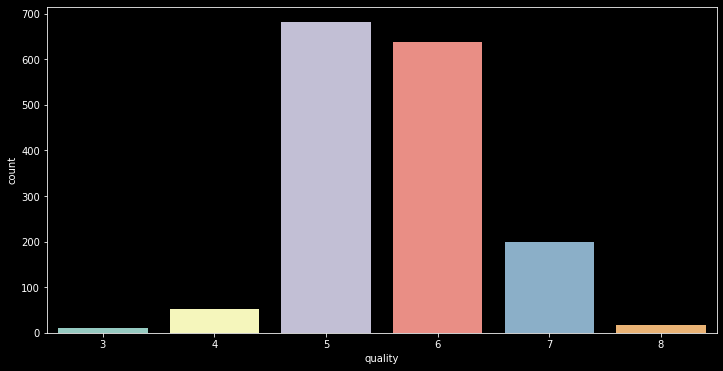

In [66]:
plt.figure(figsize = (12,6))
sns.countplot(df['quality'])
plt.show()

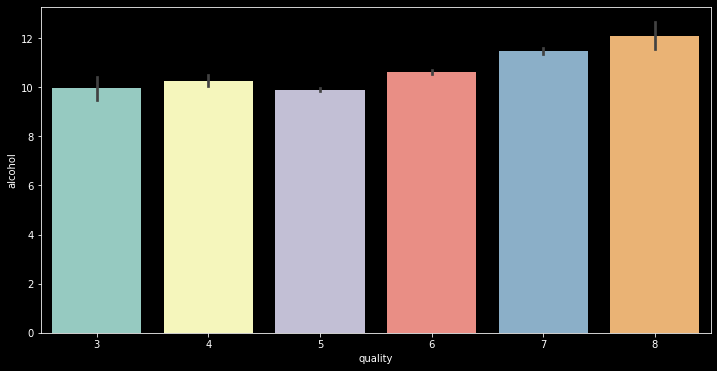

In [67]:
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y = 'alcohol', data = df)
plt.show()

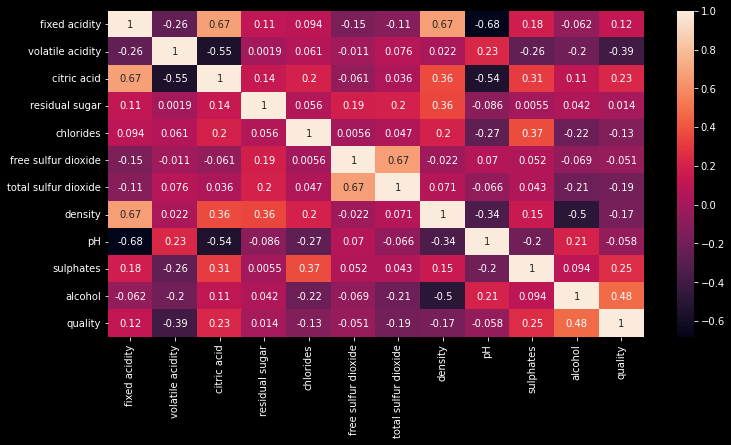

In [81]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [79]:
## oversampling
x=df.drop(['quality'], axis=1)
y=df['quality']
from imblearn.over_sampling import SMOTE
os=SMOTE()
x_res,y_res=os.fit_resample(x, y)

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.3, random_state=0)

In [73]:
from sklearn.metrics import accuracy_score

# # Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
accuracy_score(y_test, predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.49511002444987773

# # Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
accuracy_score(y_test, dt.predict(x_test))

0.8092909535452323